# CMSE 202 Midterm S23 (Sect. 002)

The goal of this midterm is to give you the opportunity to test out some of the skills that you've developed thus far this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your new programming skills.

**Important note about using online resources:** This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This midterm is designed to give you the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the midterm.

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam.

If you have any questions during the exam, you may ask the instructor, the TA, or the LA privately; simply raise your hand and one of us will come over to you. 

### Content Knowledge Tested
- Using Github to save and track progress on your work
- Using Pandas to read, manipulate, and access data files
- Using documentation and examples to effectively utilitze unfamiliar Python packages 
- Writing new classes to effectively store complex datasets

## Part 0: Add to your Git repository to track your progress on your exam (10 points total)

Before you get to far along in the exam, you're going to add it to the `cmse202-S23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

### &#9989; Part 0.1 (5 points):

1. Navigate to your `cmse202-S23-turnin` repository and create a new directory called `midterm`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

The file should now show up on your GitHub account in the `cmse202-S23-turnin` repository inside the `midterm` directory you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. It can be good to get into a habit of committing your changes any time you make a significant modification.

### Part 0.2 (2 points):
&#9989; Before you move on, **put the command(s) that your instructor should run to clone your repository in the markdown cell below.**

In [1]:
#Write your code here
!git clone "https://github.com/KollinBartz/CMSE202-s23-turnin"

fatal: destination path 'CMSE202-s23-turnin' already exists and is not an empty directory.


## Part 1: Getting Data with Curl ( points)

For this exam, you will be working with a dataset that contains **spectra.** Spectra are what you get when you separate light–like in a prism–and measure the flux (fancy word for brightness) of the different parts of the light (E.g., blue has a flux of 400, red has a flux of 600, etc.). More specifically, we measure the *wavelength* of the light (shorter wavelengths = bluer, longer wavelengths=redder). The data we’ll be working with came from a space telescope looking at different astronomical sources. 

For this exam, you only need to know that wavelength and flux are measured values used in astronomy, physics, chemistry, and biology. 


First, let’s get our data files. 

&#9989; **Download the files using `curl` and the following links. Put the commands you used to download the files in the cell below.**

- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/midterm/metadata.csv`
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/midterm/flux_values.csv`
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/midterm/wavlength_values.csv`


In [2]:
!curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/midterm/metadata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18761  100 18761    0     0   3655      0  0:00:05  0:00:05 --:--:--  4055


In [3]:
!curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/midterm/flux_values.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  468k  100  468k    0     0  95126      0  0:00:05  0:00:05 --:--:-- 97050


In [4]:
!curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/midterm/wavlength_values.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  902k  100  902k    0     0   178k      0  0:00:05  0:00:05 --:--:--  221k


## Part 2: Reading the Data (5 points)

&#9989; **Read in the data files using Pandas (put your code in the cell below).** One of them has metadata about each source, one of them has flux values for each source, and the last one has the wavelength values for each source. 

In [5]:
import pandas as pd
meta = pd.read_csv("metadata.csv")
flux = pd.read_csv("flux_values.csv")
wave = pd.read_csv("wavlength_values.csv")

## Part 3: Using a "New" Package (15 points)
For this problem, we want you to use a new package that you aren’t as used to. Specifically, you’ll be using the [Seaborn plotting package](https://seaborn.pydata.org/). 

&#9989; RA and DEC are two measurements that are equivalent to latitude and longitude on earth (I.e., they give the position on the sky). **Use the Seaborn `relplot` and your metadata dataframe to make a scatter plot of the following:** 

- RA on the x-axis 
- DEC on the y-axis 
- The size of your data points on the plot should correspond to the scale factor (a measure of total brightness of the source.) 

**Hint:** You might want to take a look at the Seaborn example gallery. 

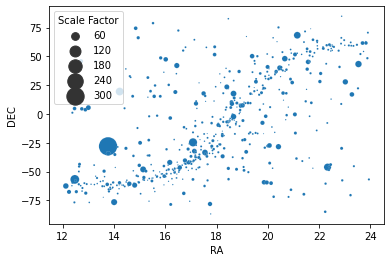

In [6]:
import seaborn as sns
ra = meta["RA"]
dec = meta["DEC"]
scale1=meta["Scale Factor"]*10000000000000000
sns.scatterplot(x=ra, y=dec, size = scale1, sizes = (.995,338));

---
### &#128721; STOP (1 point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 4: Accessing Specific Data Values with Pandas (25 points)

For this part of the exam, we’ll walk through how to use Pandas to access specific pieces of information in our dataframes.

### 4.1 Getting the Metadata (5 points)

&#9989; **Use Pandas to access the value in the the 3rd row and 2nd column in the metadata dataframe (I.e., the RA for 12073-6233).** *Hint: What is the easiest way to access data using index values?*

In [7]:
print(meta)
print(meta.iloc[2][1])
threev2= meta.iloc[2][1]

             ID      RA     DEC  Scale Factor
0    12043-6225  12.073 -62.428  1.250000e-16
1    12063-6259  12.106 -62.987  2.970000e-16
2    12073-6233  12.123 -62.554  3.130000e-15
3    12148-6741  12.247 -67.683  1.730000e-15
4    12216-6218  12.360 -62.303  2.180000e-16
..          ...     ...     ...           ...
526  23491+6243  23.819  62.732  2.220000e-16
527  23496+6131  23.827  61.526  1.250000e-15
528  23528+4821  23.881  48.360  5.740000e-16
529  23541+7031  23.902  70.526  4.120000e-16
530  23564-5651  23.941 -56.854  4.840000e-16

[531 rows x 4 columns]
12.123


### 4.2 Getting Flux Data (10 Points)

&#9989; **Use Pandas to access the entire second column of data in the flux dataframe (I.e., all flux values for 12063-6259).** Try to use the same tools as the previous problem.

In [8]:
#Write your code here
print(flux)
print(flux["12063-6259"])
twod= flux["12063-6259"]

    12043-6225  12063-6259  12073-6233   12148-6741   12216-6218   12226+0102  \
0    4119.1675   7660.9990   3196.4287  26028.45100  15835.38500  15979.91200   
1    4897.2990   7906.7840   3013.9722  23706.81400  15097.69700  15094.21800   
2    4163.9690   7821.8984   3003.1490  21255.06600  14774.41800  15370.21200   
3    5000.7207   7240.5156   3099.5684  19268.29700  15353.48500  15239.36900   
4    5769.1810   6555.7860   3130.7747  17711.97000  13989.90700  15328.07800   
..         ...         ...         ...          ...          ...          ...   
88   1767.6233   7084.0360   6564.2630    448.98490    693.25110    473.87660   
89   1146.9471   6971.7830   6309.6396    459.61176    890.75964    377.22030   
90   1392.4745   7015.5747   5954.3880    409.13416    473.78302    368.36404   
91   1278.9945   6962.2200   5337.8887    366.62670    658.46140    548.61140   
92   1440.4820   6263.4400   4638.5244    332.08942    725.74945    327.02430   

     12230-5943  12233-5920

### 4.3 Getting Wavelength Data (10 Points)

&#9989; **Use Pandas to access the entire third column of data in the wavelength dataframe (I.e., all wavelength values for 12073-6233).** Try to use the same tools as the previous two parts.

In [9]:
print(wave)
print(wave["12073-6233"])
third= wave["12073-6233"]

    12043-6225  12063-6259  12073-6233  12148-6741  12216-6218  12226+0102  \
0     7.860251    7.862759    7.864406    7.864011    7.864883    7.861944   
1     8.054492    8.052193    8.041659    8.050639    8.040395    8.045418   
2     8.226692    8.232277    8.230711    8.227723    8.228763    8.238504   
3     8.396819    8.404827    8.400978    8.405921    8.407011    8.403179   
4     8.585093    8.569422    8.574238    8.571307    8.565902    8.579400   
..         ...         ...         ...         ...         ...         ...   
88   22.180003   22.184494   22.185389   22.181462   22.177691   22.172304   
89   22.361373   22.368408   22.358518   22.367017   22.352578   22.373684   
90   22.551057   22.551896   22.558641   22.556461   22.548741   22.552584   
91   22.734353   22.738269   22.741007   22.740697   22.741439   22.725805   
92   22.923752   22.926035   22.916100   22.919023   22.916774   22.917078   

    12230-5943  12233-5920  12247-5842  12274-7647  ...  23309+

## Part 5: Designing a Class (15 points)

The issue with this dataset is that it comes in two parts: the spectra and the metadata for each source. To make life easier, we’re going to combine both the data and the metadata by designing a new class, the `spectrum` class.

&#9989; **Write a new class for this spectrum data.** Your class should have the following: 
- Attributes for each piece of information in the metadata file (I.e., ID, RA, DEC, and Scale Factor)
- Wavelengths 
- Flux 
- `get`-methods for both wavelength and flux (for the sake of time, you don’t need to write `set`-methods or `get`-methods for any of the other attributes).

In [10]:
class Spectrum():
    def __init__(self, ident):
        #doing this to make the class more independent
        self.meta = pd.read_csv("metadata.csv")
        self.flux = pd.read_csv("flux_values.csv")
        self.wave = pd.read_csv("wavlength_values.csv")
        
        #rest
        self.iD = ident
        self.mask = self.meta["ID"]==self.iD
        self.row = self.meta[self.mask]
        self.rA = self.row["RA"]
        self.dEC = self.row["DEC"]
        self.scale = self.row["Scale Factor"]
        self.waves = self.wave[self.iD]
        self.fluxs = self.flux[self.iD]
    
    def get_wave(self):
        return self.waves
        
    def get_flux(self):
        return self.fluxs

---
### &#128721; STOP (1 point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit  and push the changes to your Git repository.

---

## Part 6: Building Objects (15 points)

&#9989; **Construct `spectra` objects for all of the spectral measurements. Append all of the objects to a new list called `spectrum_objects`.** 

In [11]:
#Write your code here
identities = meta["ID"]
spectrum_objects= []
for i in identities:
    obj = Spectrum(i)
    spectrum_objects.append(obj)

## Part 7: Make a Damn Plot (10 points)

&#9989; **Select one of your spectrum objects and use it to make a plot. Your plot should have Wavelength on the x-axis and flux on the y-axis.**

*Note: You can complete this problem even if you did not complete Part 6. As long as you have A spectrum object.*

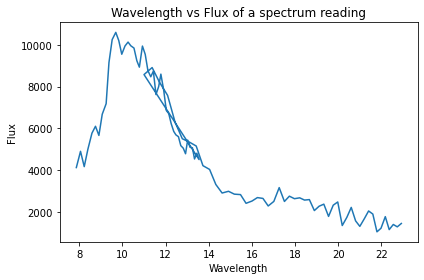

In [12]:
#Write your code here
import matplotlib.pyplot as plt
plt.plot(spectrum_objects[0].get_wave(), spectrum_objects[0].get_flux())
plt.title("Wavelength vs Flux of a spectrum reading")
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.tight_layout();

---
### &#128721; STOP (1 point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit  and push the changes to your Git repository.

---

## You're done! Congrats on finishing your CMSE 202 Midterm!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.